# Find faces in a picture

In [5]:
from PIL import Image
import face_recognition
import matplotlib.pyplot as plt

In [47]:
image = face_recognition.load_image_file("../images/test/all.jpg")

In [48]:
def rect(top, right, bottom, left):
    return [
        [left, right, right, left, left],
        [bottom, bottom, top, top, bottom]
    ]

In [68]:
def show_faces_in_picture(image, face_locations):
    plt.imshow(image)
    for face in face_locations:
        top, right, bottom, left = face
        plt.plot(*rect(top, right, bottom, left), c="r")

In [78]:
def show_all_faces(image, face_locations):
    plt.figure(figsize=(22,20))
    for i, face in enumerate(face_locations):
        top, right, bottom, left = face
        plt.subplot(10, 6, i+1)
        plt.imshow(image[top:bottom, left:right])
        plt.axis("off")
        plt.title(i)

## Using just face detection library (really fast)

CPU times: user 457 ms, sys: 3.11 ms, total: 461 ms
Wall time: 458 ms


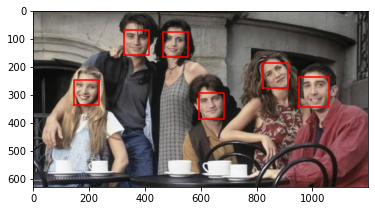

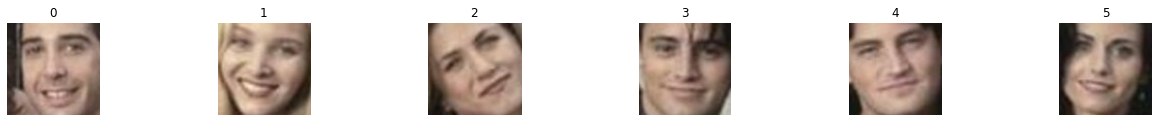

In [83]:
%%time
face_locations = face_recognition.face_locations(image)
show_faces_in_picture(image, face_locations)
show_all_faces(image, face_locations)

## Using CNN (slower but more accurate?)

CPU times: user 3.01 s, sys: 460 ms, total: 3.47 s
Wall time: 1.29 s


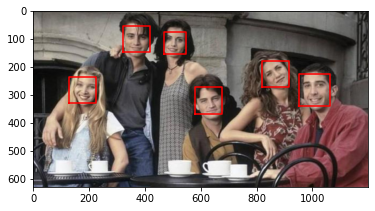

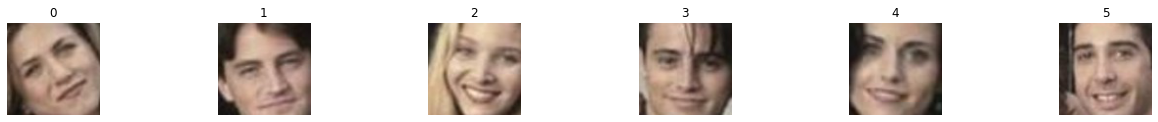

In [84]:
%%time
face_locations_cnn = face_recognition.face_locations(image, number_of_times_to_upsample=0, model='cnn')
show_faces_in_picture(image, face_locations_cnn)
show_all_faces(image, face_locations_cnn)